<a href="https://colab.research.google.com/github/Valepowell/ML_Proyecto1_Parte_final/blob/main/Proyecto_1_Parte_final_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 1: Exploración y Visualización de Datos (EDA)

1. Carga y Exploración Inicial de Datos:
- Cargar el dataset y revisar su estructura básica.
- Describir las variables y su distribución.
- Identificar y tratar valores nulos y outliers.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/BBDD/Retail_Transaction_Dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied(%)  100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB


In [ ]:
df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


In [ ]:
df.columns = df.columns.str.lower().str.strip()

In [ ]:
# Revisar duplicados.
df[df.duplicated()]

,customerid,productid,quantity,price,transactiondate,paymentmethod,storelocation,productcategory,discountapplied(%),totalamount


In [ ]:
# Verificar valores nulos
print(df.isnull().sum())

customerid            0
productid             0
quantity              0
price                 0
transactiondate       0
paymentmethod         0
storelocation         0
productcategory       0
discountapplied(%)    0
totalamount           0
dtype: int64


In [ ]:
df.describe()

,customerid,quantity,price,discountapplied(%),totalamount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,500463.982180,5.009290,55.067344,10.020155,248.334955
std,288460.917524,2.579808,25.971567,5.779534,184.554792
min,14.000000,1.000000,10.000430,0.000046,8.274825
25%,250693.750000,3.000000,32.549474,5.001013,95.163418
50%,499679.000000,5.000000,55.116789,10.030353,200.368393
75%,751104.750000,7.000000,77.456763,15.018367,362.009980
max,999997.000000,9.000000,99.999284,19.999585,896.141242


In [ ]:
df.dtypes

,0
customerid,int64
productid,object
quantity,int64
price,float64
transactiondate,object
paymentmethod,object
storelocation,object
productcategory,object
discountapplied(%),float64
totalamount,float64


2. Análisis de Correlación:
- Realizar un análisis de correlación y crear un mapa de calor para visualizar las relaciones entre las variables.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

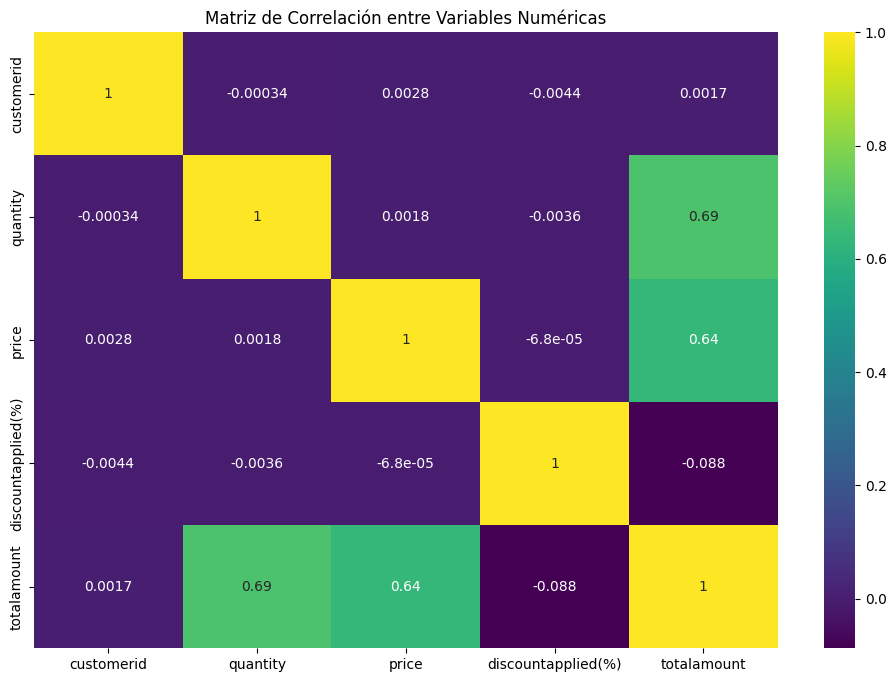

In [ ]:
# Correlación numérica generadas con las columnas númericas
num_df = df.select_dtypes(include=[np.number])

correlacion_matriz = num_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion_matriz, annot=True, cmap='viridis')
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

3. Visualización de Datos:
- Crear subplots para comparar diferentes variables clave.
- Añadir cuadrículas, leyendas, anotaciones y flechas a los gráficos para mejorar la claridad y la información.

In [ ]:
# Para graficas eliminamos tomasmos las columnas numericas y eliminamos curtomerid
num_cols = df.select_dtypes(include=['float64', 'int64']).drop("customerid", axis=1)
#num_cols = df.drop("customerid", axis=1)

num_cols

,quantity,price,discountapplied(%),totalamount
0,7,80.079844,18.677100,455.862764
1,4,75.195229,14.121365,258.306546
2,8,31.528816,15.943701,212.015651
3,5,98.880218,6.686337,461.343769
4,7,93.188512,4.030096,626.030484
...,...,...,...,...
99995,2,56.078258,18.345145,91.581240
99996,6,88.516406,3.995541,509.878179
99997,4,72.385564,17.423979,239.092472
99998,5,66.542239,14.345018,284.983717


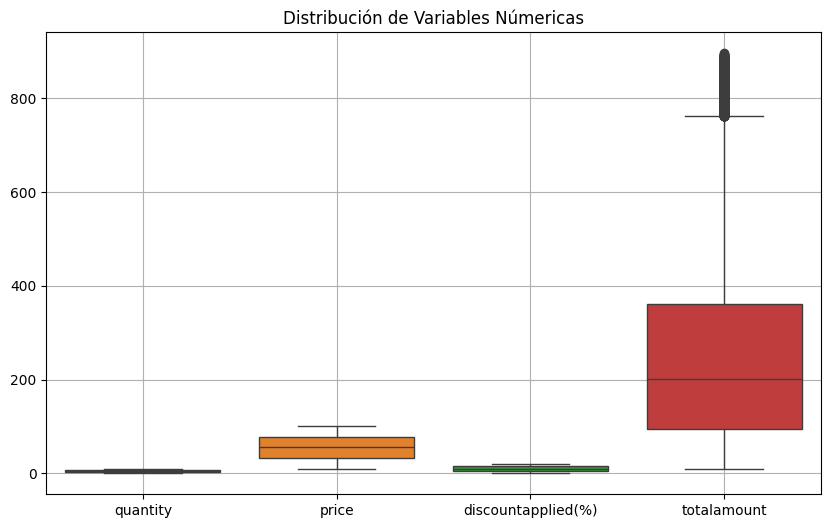

In [ ]:
# Visualization 2: Boxplot para las variables numericas
#color = sns.color_palette("viridis")[1]
plt.figure(figsize=(10, 6))
sns.boxplot(data=num_cols)
plt.title("Distribución de Variables Númericas")
plt.gca().grid(True, linestyle='-')
plt.show()

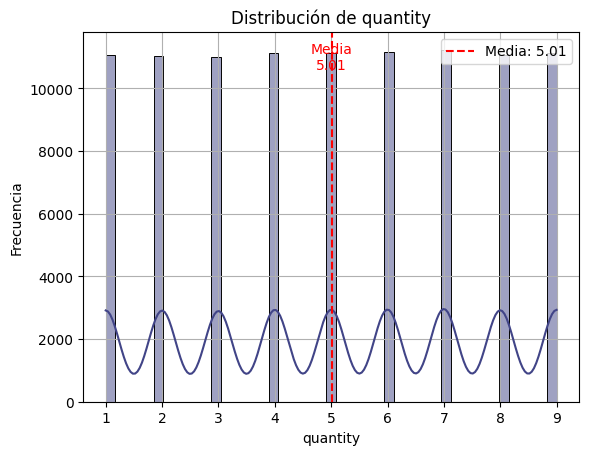

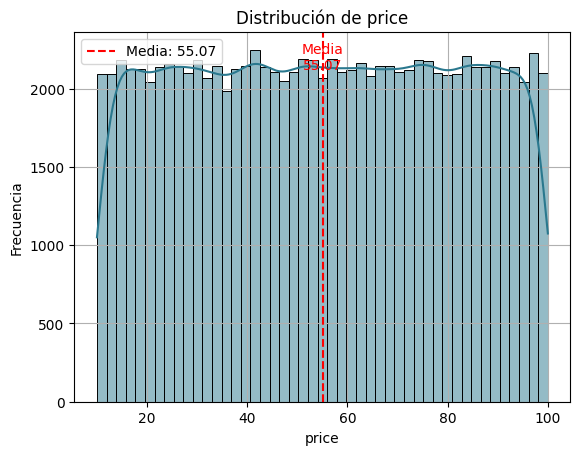

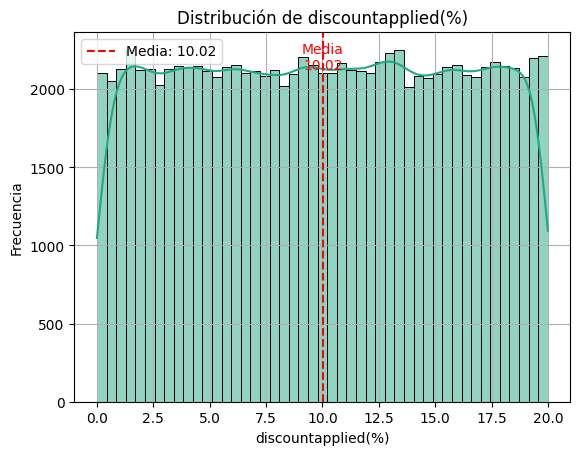

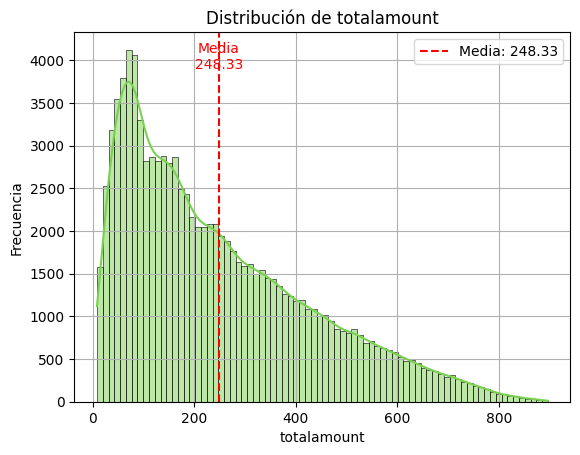

In [ ]:
import matplotlib.pyplot as plt # Ensure plt is available
import seaborn as sns # Ensure seaborn is available

# generar un cor diferente para cada grafico
colors = sns.color_palette("viridis", len(num_cols.columns))

for i, col in enumerate(num_cols.columns):
    plt.figure()
    sns.histplot(num_cols[col], kde=True, color=colors[i])
    plt.title("Distribución de " + col, fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Frecuencia", fontsize=10)
    # agregar la grilla
    plt.gca().grid(True, linestyle='-')
    # poner anotación de la media de cada grafico
    media = num_cols[col].mean()
    plt.axvline(media, color='red', linestyle='--', label=f"Media: {media:.2f}")
    plt.text(media, plt.ylim()[1]*0.9, f'Media\n{media:.2f}',
             color='red', ha='center')

    plt.legend()
    plt.show()

# Parte 2: Preprocesamiento de Datos

1. Transformación de Columnas:
- Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas.
- Realizar codificación de variables categóricas y escalado de variables numéricas.
2. Pipelines:
Crear pipelines para automatizar el preprocesamiento de datos y asegurar la reproducibilidad.


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customerid          100000 non-null  int64  
 1   productid           100000 non-null  object 
 2   quantity            100000 non-null  int64  
 3   price               100000 non-null  float64
 4   transactiondate     100000 non-null  object 
 5   paymentmethod       100000 non-null  object 
 6   storelocation       100000 non-null  object 
 7   productcategory     100000 non-null  object 
 8   discountapplied(%)  100000 non-null  float64
 9   totalamount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB


In [ ]:
# Eliminar columnas que no sirven para el modelo
df_1= df.drop(columns=['storelocation'])

# Separacion de X e y
X = df_1.drop(columns=['quantity'])
y = df_1['quantity']

# Identifica columnas numericas y columnas categorica
num_features = X.select_dtypes(include=['float64', 'int64']).columns
cat_features = X.select_dtypes(include=['object']).columns


In [ ]:
# Crear transformers
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar en ColumnTransformer independientes por modelo
preprocessor_lr = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

preprocessor_knn = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

preprocessor_ar = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

preprocessor_rf = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

preprocessor_eval = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# Parte 3: Benchmarking de Técnicas de Machine Learning

1. Selección de Modelos:
- Entrenar y evaluar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost y LGBM).
- Utilizar validación cruzada para evaluar el rendimiento de los modelos.
2. Comparación de Modelos:
- Comparar los modelos utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.
- Seleccionar el mejor modelo basado en las métricas obtenidas.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [ ]:
# Separación de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Módelo de regresión logística**

In [ ]:
# Pipeline con logistic regression.
pipe_lr = Pipeline(steps=[
    ('preprocessor', preprocessor_lr),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Entrenar en todo el train para evaluar
pipe_lr.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['customerid', 'price', 'discountapplied(%)', 'totalamount'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['productid', 'transactiondate', 'paymentmethod', 'productcategory'], dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
# Prediccion LR.
y_pred_lr = pipe_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
r2_score_lr = r2_score(y_test, y_pred_lr)


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

pipe_knn = Pipeline(steps=[
    ('preprocessor', preprocessor_knn),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])

pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['customerid', 'price', 'discountapplied(%)', 'totalamount'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['productid', 'transactiondate', 'paymentmethod', 'productcategory'], dtype='object'))])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
# Prediccion KKN.
y_pred_knn = pipe_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
r2_score_knn = r2_score(y_test, y_pred_knn)


**Árbol de decisiones**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pipe_ar = Pipeline(steps=[
    ('preprocessor', preprocessor_ar),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipe_ar.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['customerid', 'price', 'discountapplied(%)', 'totalamount'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['productid', 'transactiondate', 'paymentmethod', 'productcategory'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [ ]:
# Prediccion Arbol.
y_pred_ar = pipe_ar.predict(X_test)
accuracy_ar = accuracy_score(y_test, y_pred_ar)
r2_score_ar = r2_score(y_test, y_pred_ar)

**Random Forest**


In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor_rf),
    ('classifier', RandomForestClassifier(n_estimators=10, random_state=42))
])


pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['customerid', 'price', 'discountapplied(%)', 'totalamount'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['productid', 'transactiondate', 'paymentmethod', 'productcategory'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(n_estimators=10, random_state=42))])

In [ ]:
# Prediccion Arbol.
y_pred_rf = pipe_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
r2_score_rf = r2_score(y_test, y_pred_rf)

In [ ]:
print("Resultado de Acuracy para los modelos analizados:")
print(f"Resultado de Acuracy Regresión Lineal : {accuracy_lr:.4f} - Valor R2: {r2_score_lr:.3f}")
print(f"Resultado de Acuracy KNN              : {accuracy_knn:.4f} - Valor R2: {r2_score_knn:.3f}")
print(f"Resultado de Acuracy Ärbol de decisíon: {accuracy_ar:.4f} - Valor R2: {r2_score_ar:.3f}")
print(f"Resultado de Acuracy Random Forest    : {accuracy_rf:.4f} - Valor R2: {r2_score_rf:.3f}")

Resultado de Acuracy para los modelos analizados:
Resultado de Acuracy Regresión Lineal : 0.9619 - Valor R2: 0.993
Resultado de Acuracy KNN              : 0.3911 - Valor R2: 0.734
Resultado de Acuracy Ärbol de decisíon: 0.9805 - Valor R2: 0.997
Resultado de Acuracy Random Forest    : 0.6499 - Valor R2: 0.892


Resultado de Acuracy para los modelos analizados:
Resultado de Acuracy Regresión Lineal :  0.96195
Resultado de Acuracy KNN              :  0.39115
Resultado de Acuracy Ärbol de decisíon:  0.9805
Resultado de Acuracy Random Forest    :  0.6499

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Crear pipelines para cada modelo incluyendo el preprocesador
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1), # Corrected syntax and removed cv, scoring
}


# Guardar resultados
results = {}

print("Realizando validación cruzada para cada modelo:\n")

for name, model in models.items():
    # Crear un pipeline que primero preprocese los datos y luego aplique el modelo
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    print(f"\nEvaluando {name} con validación cruzada...")

    # Realizar validación cruzada (cv=3 significa 3 folds)
    scores = cross_val_score(pipe, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)

    results[name] = scores.mean()
    print(f"{name}: Accuracy CV Promedio = {scores.mean():.4f}")

print("\n\nResultados de la Validación Cruzada:")
for name, mean_accuracy in results.items():
    print(f"{name}: {mean_accuracy:.4f}")

Realizando validación cruzada para cada modelo:
Evaluando Logistic Regression con validación cruzada...
Logistic Regression: Accuracy CV Promedio = 0.9595
Evaluando KNN con validación cruzada...
KNN: Accuracy CV Promedio = 0.3541
Evaluando Decision Tree con validación cruzada...
Decision Tree: Accuracy CV Promedio = 0.9717
Evaluando Random Forest con validación cruzada...
Random Forest: Accuracy CV Promedio = 0.6162

Resultados de la Validación Cruzada:
Logistic Regression: 0.9595
KNN: 0.3541
Decision Tree: 0.9717
Random Forest: 0.6162


Nota: tiempo de procesamiento 8:53 seg.

**Realizando validación cruzada para cada modelo:**
- Evaluando Logistic Regression con validación cruzada...
- Logistic Regression: Accuracy CV Promedio = 0.9595
- Evaluando KNN con validación cruzada...
- KNN: Accuracy CV Promedio = 0.3541
- Evaluando Decision Tree con validación cruzada...
- Decision Tree: Accuracy CV Promedio = 0.9717
- Evaluando Random Forest con validación cruzada...
- Random Forest: Accuracy CV Promedio = 0.6162

**Resultados de la Validación Cruzada:**
Logistic Regression: 0.9595
KNN: 0.3541
Decision Tree: 0.9717
Random Forest: 0.6162

# Parte 4: Análisis de Métricas

1- Informe de Clasificación:
- Generar un informe de clasificación para los modelos evaluados.
- Incluir la matriz de confusión para una comprensión detallada de los errores de clasificación.
**2. Curva ROC y AUC: NO Incluido por autización de profesor**
- Crear y visualizar la curva ROC para los modelos de clasificación binaria.
- Calcular el AUC para evaluar la capacidad del modelo para distinguir entre clases.

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2198
           2       1.00      1.00      1.00      2234
           3       0.99      0.99      0.99      2225
           4       0.98      0.99      0.99      2252
           5       0.98      0.98      0.98      2193
           6       0.98      0.97      0.98      2218
           7       0.97      0.96      0.96      2234
           8       0.95      0.95      0.95      2184
           9       0.97      0.97      0.97      2262

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



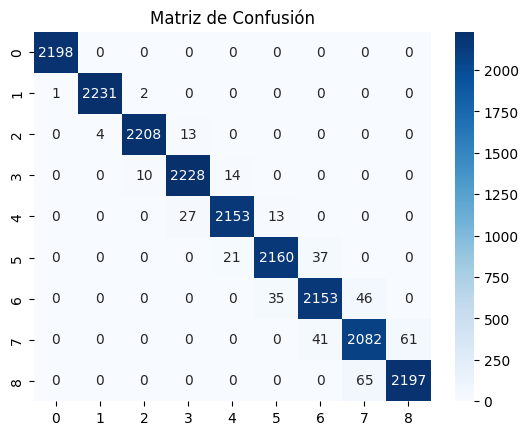

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenar el mejor modelo (Random Forest como ejemplo)
pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor_eval),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# RandomForestClassifier(n_estimators=5, random_state=42, n_jobs=-1)
pipe_rf.fit(X_train, y_train)
y_pred = pipe_rf.predict(X_test)
y_prob = pipe_rf.predict_proba(X_test)[:, 1]

# Informe
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

**El resutado para el mejor modelo Arbol de desición es el sigueinte:**

precision    recall  f1-score   support

           1       1.00      1.00      1.00      2198
           2       1.00      1.00      1.00      2234
           3       0.99      0.99      0.99      2225
           4       0.98      0.99      0.99      2252
           5       0.98      0.98      0.98      2193
           6       0.98      0.97      0.98      2218
           7       0.97      0.96      0.96      2234
           8       0.95      0.95      0.95      2184
           9       0.97      0.97      0.97      2262

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000

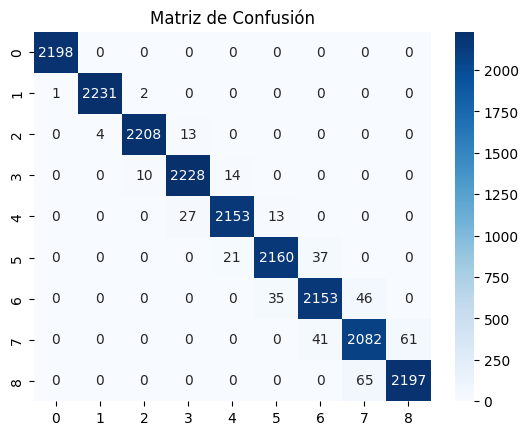

Para el modelo Random Forest, con el 2do mejor resultado, es el siguiente
      precision    recall  f1-score   support

           1       0.85      0.97      0.91      2198
           2       0.75      0.82      0.78      2234
           3       0.63      0.67      0.65      2225
           4       0.52      0.57      0.54      2252
           5       0.48      0.48      0.48      2193
           6       0.46      0.42      0.44      2218
           7       0.43      0.42      0.43      2234
           8       0.42      0.41      0.42      2184
           9       0.65      0.49      0.56      2262
    accuracy                           0.58     20000
   macro avg       0.58      0.58      0.58     20000
weighted avg       0.58      0.58      0.58     20000

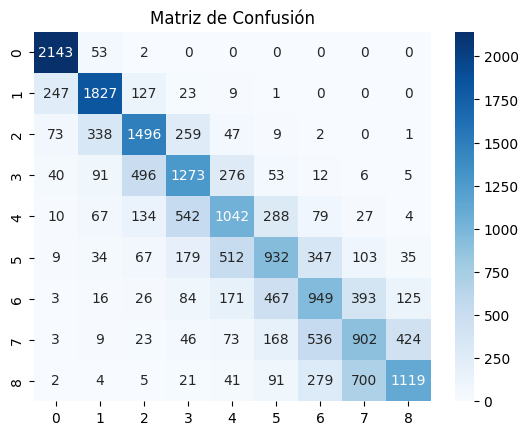

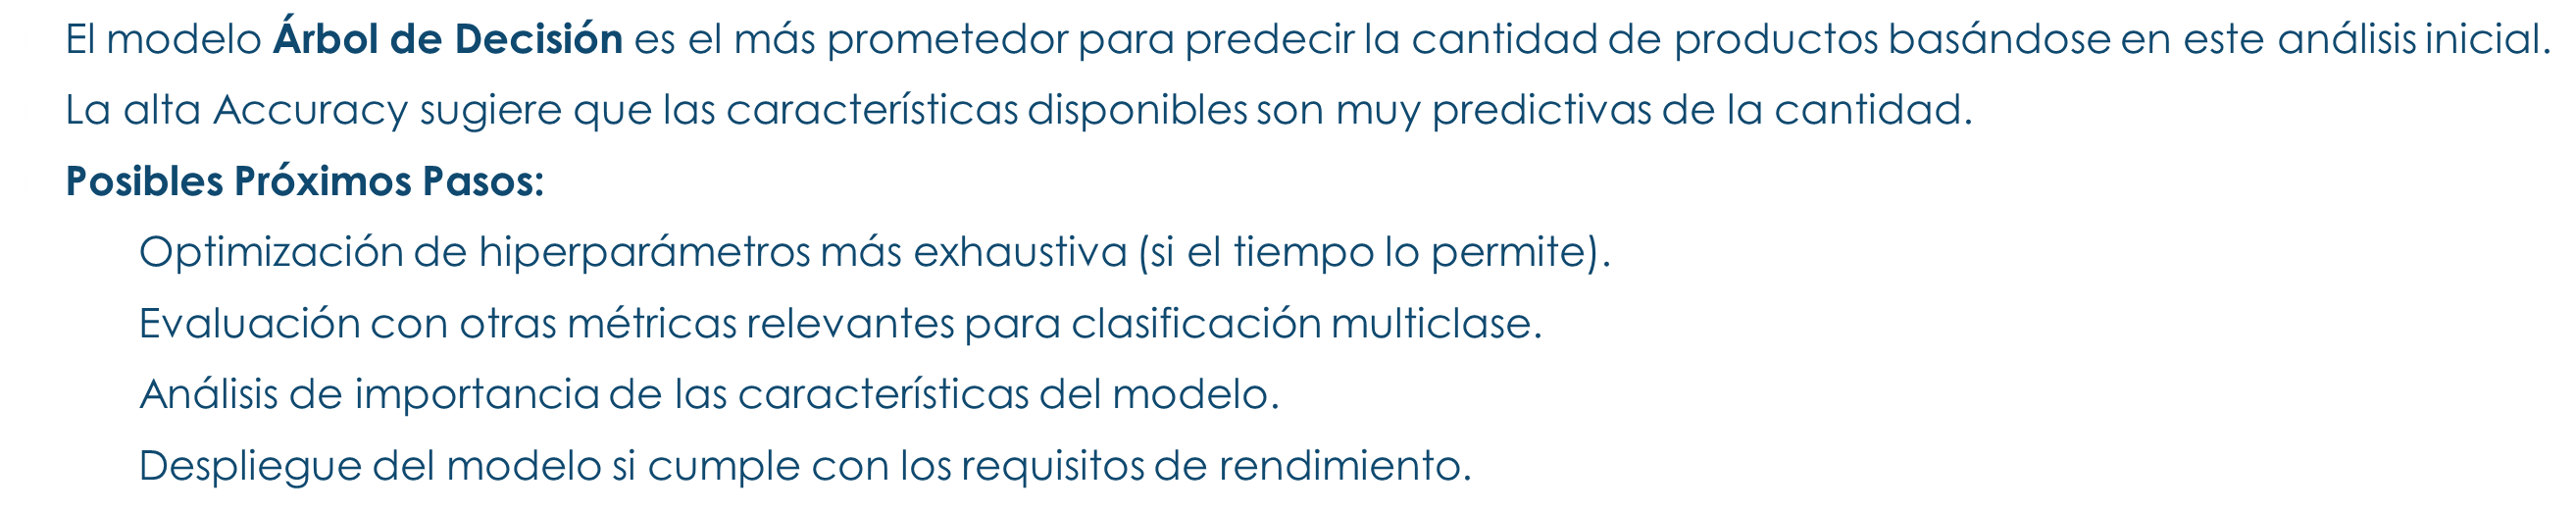

**Parte 3: Benchmarking de Técnicas de Machine Learning**

Se dividió el conjunto de datos en conjuntos de entrenamiento y prueba.
Se entrenaron y evaluaron los siguientes modelos utilizando pipelines que incluyen el preprocesamiento:
- Regresión Logística
- KNN
- Árbol de Decisión
- Random Forest
Se calcularon la precisión (accuracy) y el R2 score para las predicciones en el conjunto de prueba para cada modelo.
Se realizó validación cruzada (con 3 folds) para cada modelo para obtener una medida más robusta del rendimiento (Accuracy CV Promedio).

**Resultados de la Validación Cruzada:**

- Regresión Logística: Accuracy CV Promedio = 0.9595
- KNN: Accuracy CV Promedio = 0.3541
- Árbol de Decisión: Accuracy CV Promedio = 0.9717
- Random Forest: Accuracy CV Promedio = 0.6162

**Parte 4: Análisis de Métricas**

- Se generó un informe de clasificación y una matriz de confusión para el modelo de Árbol de Decisión (identificado como el mejor modelo basado en la validación cruzada).
- Se presentó también el informe de clasificación y la matriz de confusión para el modelo Random Forest.

**Observaciones clave:**

- No hay valores nulos ni duplicados en el conjunto de datos.
- El modelo de Árbol de Decisión ha mostrado el mejor rendimiento en términos de precisión (Accuracy CV Promedio = 0.9717) en la validación cruzada.
- El modelo de Regresión Logística también tuvo un buen rendimiento (Accuracy CV Promedio = 0.9595).
- Los modelos KNN y Random Forest tuvieron un rendimiento significativamente menor en la validación cruzada en comparación con la Regresión Logística y el  Árbol de Decisión.
- Los informes de clasificación y matrices de confusión para el Árbol de Decisión y Random Forest proporcionan detalles sobre el rendimiento de cada clase.

**Conclusiones:**

Basándonos en los resultados obtenidos en las diferentes etapas del análisis, podemos extraer las siguientes conclusiones:

- Calidad de los Datos: El dataset inicial presenta una buena calidad, ya que no se encontraron valores nulos ni duplicados, lo que simplificó la etapa de preprocesamiento al no requerir imputaciones complejas o eliminación de duplicados.
- Análisis Exploratorio: La exploración inicial y visualización de los datos permitieron comprender la distribución de las variables numéricas y las relaciones de correlación entre ellas. Aunque algunas correlaciones son evidentes (como la relación entre quantity, price y totalamount), el mapa de calor ayudó a visualizar estas interdependencias. Los boxplots e histogramas ofrecieron una visión detallada de la dispersión y forma de las distribuciones de cada variable numérica.
- Preprocesamiento: La implementación de pipelines para el preprocesamiento (escalado de variables numéricas y codificación One-Hot de categóricas) fue efectiva para preparar los datos para los modelos de machine learning de manera automatizada y reproducible. La eliminación de la columna 'storelocation' se justifica si se considera que no aporta información relevante para predecir la cantidad (quantity).
- Benchmarking de Modelos: Se comparó el rendimiento de varios modelos de clasificación para predecir la cantidad (quantity). La validación cruzada fue una técnica adecuada para obtener una estimación más robusta del rendimiento de cada modelo en datos no vistos.
- Rendimiento de los Modelos:
  - El Árbol de Decisión demostró ser el modelo con el mejor rendimiento general, obteniendo la mayor precisión promedio en la validación cruzada (0.9717) y un excelente R2 score en el conjunto de prueba (0.997). Su informe de clasificación y matriz de confusión en el conjunto de prueba muestran una alta precisión y recall para la mayoría de las clases de cantidad.
  - La Regresión Logística también tuvo un rendimiento sólido (Accuracy CV Promedio = 0.9595, R2 score = 0.993), lo que sugiere que una relación lineal o casi lineal puede capturar bien la variabilidad de la variable objetivo en este caso.
  - KNN y Random Forest presentaron un rendimiento significativamente inferior en la validación cruzada (0.3541 y 0.6162 respectivamente) en comparación con el Árbol de Decisión y la Regresión Logística, lo que indica que no son tan adecuados para este problema de clasificación específico con la configuración utilizada.
  
En resumen, el análisis exploratorio reveló la buena calidad de los datos y las relaciones entre variables. El preprocesamiento se realizó de manera efectiva mediante pipelines. El benchmarking de modelos, evaluado con validación cruzada, identificó al Árbol de Decisión como el modelo con el mejor rendimiento para predecir la cantidad de productos en las transacciones.

Estos hallazgos sugieren que el Árbol de Decisión es el modelo más prometedor para utilizar en futuras etapas o para la implementación en un sistema de predicción de cantidad de transacciones, si ese fuera el objetivo final.